# The Estimator API of TensorFlow for Classification

Also here we will be dealing with categorical vars as well with the feature_cols variables we will create

To use the Estimator API, do the following

1. Define a list of feature columns

2. Create the estimator model

3. Create a data input function

4. Call train, evaluate(test) and predict(unknown label) on the estimator object

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
diabetes.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [5]:
diabetes.dtypes.value_counts()

float64    6
int64      3
object     1
dtype: int64

In [6]:
diabetes.isnull().any()

Number_pregnant          False
Glucose_concentration    False
Blood_pressure           False
Triceps                  False
Insulin                  False
BMI                      False
Pedigree                 False
Age                      False
Class                    False
Group                    False
dtype: bool

## Preprocessing

In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
# columns to normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
# Normalizing using pandas
# This is a good one line alternative to sklearn.Normalizer()
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/x.max()-x.min())
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


We are using estimator API

In [10]:
# We need feature columns first in order to use the estimatorAPI
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

For categorical feautures

Two ways to do this - ono is by using a vocabulary list and 

other is by using a hash bucket

Lets try both

In [12]:
# Here we know that the feature Group has 4 popssible values - A, B, C, D
# Use vocabulary list in such case
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', ['A', 'B', 'C', 'D'])

In [13]:
# If we do not know what all categories we have and want to automatically create it
# Or the number of categories is too much
# Use a hash bucket
# Here I believe that there are atmost 10 cat columns
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', 
                                                                      hash_bucket_size=10)

In [14]:
# Right now lets go with vocList
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', ['A', 'B', 'C', 'D'])

In [15]:
# For age
import matplotlib.pyplot as plt
%matplotlib inline

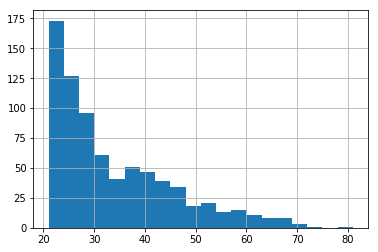

In [16]:
diabetes['Age'].hist(bins=20);

In [17]:
# bucket age into categories
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [18]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree,
            assigned_group, age_bucket]

Now we have the list of all the feature columns

Now do train test split

In [19]:
# separate Features and labels
x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3)

## Using TensorFlow Estimator API

We already have made the feature columns, now to make the input functions

In [22]:
# Make input function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10,
                                                num_epochs=1000, shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppeffzoyc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfeb42d320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
# Train the model
# A type in the naming of column in line 11 led to an error here
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppeffzoyc/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 106.468
INFO:tensorflow:loss = 5.531373, step = 101 (0.943 sec)
INFO:tensorflow:global_step/sec: 318.422
INFO:tensorflow:loss = 5.3488793, step = 201 (0.314 sec)
INFO:tensorflow:global_step/sec: 2

In [25]:
# Make input function for testing the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10,
                                                      num_epochs=1, shuffle=False)

In [26]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-18T05:26:43Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmppeffzoyc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-18-05:26:45
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77922076, accuracy_baseline = 0.6839827, auc = 0.82495224, auc_precision_recall = 0.7050744, average_loss = 0.4939593, global_step = 1000, label/mean = 0.31601733, loss = 4.7543583, precision = 0.6571429, prediction/mean = 0.37634206, recall = 0.63013697
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmppeffzoyc/model.ckpt-1000


In [27]:
results

{'accuracy': 0.77922076,
 'accuracy_baseline': 0.6839827,
 'auc': 0.82495224,
 'auc_precision_recall': 0.7050744,
 'average_loss': 0.4939593,
 'label/mean': 0.31601733,
 'loss': 4.7543583,
 'precision': 0.6571429,
 'prediction/mean': 0.37634206,
 'recall': 0.63013697,
 'global_step': 1000}

In [28]:
# Making predictions

# Make a prediction input function
pred_inpt_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1,
                                                    shuffle=False)

In [30]:
predictions = model.predict(pred_inpt_func)

In [33]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppeffzoyc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
my_pred

[{'logits': array([0.93781984], dtype=float32),
  'logistic': array([0.71865904], dtype=float32),
  'probabilities': array([0.28134093, 0.71865904], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.36876655], dtype=float32),
  'logistic': array([0.5911609], dtype=float32),
  'probabilities': array([0.4088391, 0.5911609], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.76137024], dtype=float32),
  'logistic': array([0.31834888], dtype=float32),
  'probabilities': array([0.6816512 , 0.31834885], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.19865203], dtype=float32),
  'logistic': array([0.54950035], dtype=float32),
  'probabilities': array([0.45049962, 0.5495003 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.0652497], dtype=float32),
  'logistic': 

In [44]:
# Finding the class prediction of record 1 ie index 0
my_pred[0]['class_ids'][0]

1

In [45]:
# Making a prediction vector
prediction_vector = []
for pred in my_pred:
    prediction_vector.append(pred['class_ids'][0])

In [49]:
print(prediction_vector.count(0), prediction_vector.count(1))

161 70


In [53]:
prediction_vector.count(0) + prediction_vector.count(1)

231

In [55]:
len(prediction_vector)

231